# Μέρος 1

In [6]:
import random
random.seed(2018)  # for reproducibility
from simple_markov_chain_lib import markov_chain
import statistics as stat ## import the library statistics. We will use it to compute the mean and variance of our list

def tennis_match(p):
    # A dictionary for the initial distibution. 
    # We prescribe the initial distribution
    init_probs = {"0-0": 1.0} 

    # A dictionary for the transition probability  matrix. 
    # Every state-key corresponds to a list with tuples of (Next_State,Probability) 
    q = 1-p
    markov_table = {
        "A": {"A": 1},
        "B": {"B": 1},

        "0-0": {"15-0": p, "0-15": q},
        "15-0": {"30-0": p, "15-15": q},
        "0-15": {"15-15": p, "0-30": q},
        "30-0": {"40-0": p, "30-15": q},
        "0-30": {"15-30": p, "0-40": q},
        "40-0": {"A": p, "40-15": q},
        "0-40": {"15-40": p, "B": q},

        "15-15": {"30-15": p, "15-30": q},
        "Deuce": {"AdvA": p, "AdvB": q},

        "30-15": {"40-15": p, "Deuce": q},
        "15-30": {"Deuce": p, "15-40": q},
        "40-15": {"A": p, "AdvA": q},
        "15-40": {"AdvB": p, "B": q},

        "AdvB": {"Deuce": p, "B": q},
        "AdvA": {"A": p, "Deuce": q}

    }

    # Ok... we are ready know
    # Let's construct a Markov Chain. So let's call the constructor
    mc = markov_chain(markov_table, init_probs)
    estimates=[] ## create the empty list estimates.
    M = 50

    ## Experiment parameters

    for j in range(0,M):
        N = 5000     # number of samples
        counter = 0  # to count the number of times the event {X_40  = 1} occurs

        ## Simulation
        for i in range(N):
            mc.start()  # new experiment
            while mc.running_state != "A" and mc.running_state != "B":  mc.move()
            if mc.running_state == "A":  counter += 1

        phat = counter / N
        estimates.append(phat)

    return stat.mean(estimates)

In [7]:
Tennis_probabilities = []
for i in range(2,100,2):
    Tennis_probabilities.append(tennis_match(i/100))
    

In [8]:
import numpy as np  # numerical computations library. We will call it np in our code
import matplotlib.pyplot as plt  # library for plotting. We will call it plt in our code

# to plot the results in the notebook:
%matplotlib inline

start, end, step = .02, 1, 0.02
x = np.arange(start, end, step)

Text(0.5, 1.0, 'Tennis Match')

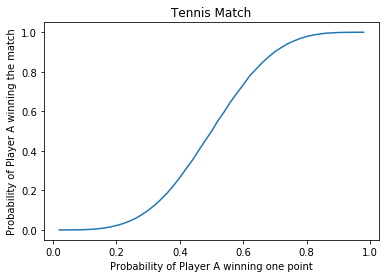

In [9]:
plt.figure()
plt.plot(x, Tennis_probabilities)
# Specify some extra attributes
plt.xlabel('Probability of Player A winning one point')
plt.ylabel('Probability of Player A winning the match')
plt.title('Tennis Match')

## Παραδοτέο

Παρατηρούμε ότι η γραφική παράσταση που προκύπτει είναι ικανοποιητικά ομαλή! Κοντά στα σημεία ενδιαφέροντος p = 0, p = 1 παρατηρούμε το αναμενόμενο , ότι δηλαδή η πιθανότητα να κερδίσει ο παίκτης είναι πολύ κοντα στο 1 και 0 αντίστοιχα. Επίσης παρατηρούμε ότι υπάρχει συμμετρία στην καμπύλη γύρω από το σημείο (1/2,1/2)!


# Μέρος 2

In [38]:
from simple_markov_chain_lib import markov_chain  # import markov chain simulator
import statistics as stat ## import the library statistics. We will use it to compute the mean and variance of our list

# Transition Table
markov_table = {
    0: {1: .5, 2: .5},  # from state 0 we move to state 1 with prob 0.5 and to state 2 with 0.5
    1: {0: 1/3, 3: 2/3},
    2: {2: 1.},
    3: {0: .5, 3: .25, 4: .25},
    4: {4: 1.}
}

# Initial Distribution
init_dist = {0: 1.}  # we start from state 0 with probability 1
vari = []
mc = markov_chain(markov_table, init_dist)

for i in range(2**5,2**12,100):

    sample_size = i# Ν

    estimates=[]
    for M in range(30):
        running_total = 0
        for i in range(sample_size):
            mc.start()

            while mc.running_state != 2 and mc.running_state != 4:
                mc.move()
            running_total += mc.steps  # steps it took to be absorbed

        mc_estimate = running_total / sample_size
        estimates.append(mc_estimate)
    
    vari.append(stat.variance(estimates))


Text(0.5, 1.0, 'Logarithmic')

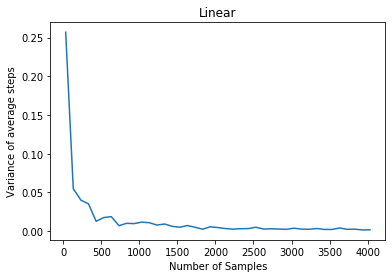

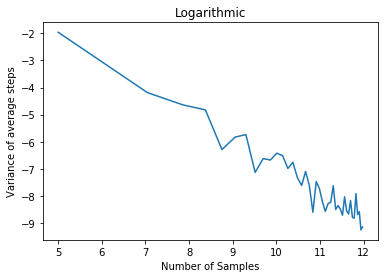

In [39]:
start, end, step = 2**5, 2**12, 100
x = np.arange(start, end, step)

plt.figure()
plt.plot(x, vari)
# Specify some extra attributes
plt.xlabel('Number of Samples')
plt.ylabel('Variance of average steps')
plt.title('Linear')

newx = np.log2(x)
newvar = np.log2(vari)

plt.figure(2)
plt.plot(newx, newvar)
plt.xlabel('Number of Samples')
plt.ylabel('Variance of average steps')
plt.title('Logarithmic')


Text(0.5, 1.0, 'Linear approximation of logarithmic scale')

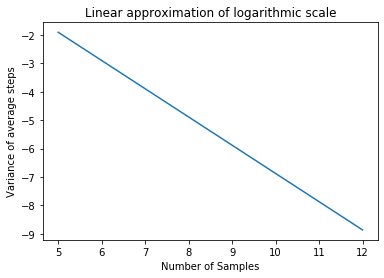

In [40]:
a,b = np.polyfit(newx,newvar,1)
x = []
x = np.linspace(5,12,num=8)
y = a*x + b
plt.plot(x, y)
plt.xlabel('Number of Samples')
plt.ylabel('Variance of average steps')
plt.title('Linear approximation of logarithmic scale')

## Παραδοτέο

Εκτιμήσαμε την διασπορά του μέσου αριθμού βημάτων μέχρι την απορρόφηση με αριθμό δείγματων απο 2^5 έως 2^12 (με βήμα 100). Παρατηρούμε την μείωση της διασποράς καθώς αυξάνουμε τον αριθμό δειγμάτων. Αυτό είναι αναμενόμενο. Αύξηση του αριθμού των δειγμάτων οδηγεί πάντα σε μείωση της διασποράς καθώς η εκτιμόμενη τιμή τείνει να προσεγγίσει την πραγματική της τιμή (σύμφωνα με Νόμο των μεγάλων αριθμών).